In [2]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [4]:
job_params = {    
    'notch_filt' :     None,
    'planes' :         n.arange(0,15),
    'n_ch_tif' : 15,
    'convert_plane_ids_to_channel_ids' : False,
    'fix_fastZ' : True,
    
    'n_init_files' :   3,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : False,
    'override_crosstalk' : None,
    'crosstalk_n_planes' : 10, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [5]:
subjects_dir =   '/mnt/zaru-subjects/'
expt_info = { 
    'subject':         'AH010',
    'date' :          '2024-01-17',
    'expnum' :         [6],}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False)

job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

In [6]:
job_params['fs']

40.0647

In [7]:
# Create the job
job = Job(savedir,exp_str, tifs = tifs,
          params=job_params, create=False, overwrite=True, verbosity = 3)

   Found and loaded params from /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_6/params.npy


In [8]:
# optional parameters for initialization
# load 1 file to initialize, and select 200 frames randomly to do initalization on
job.params['n_init_files'] = 4
job.params['init_n_frames'] = None

In [9]:
# # %%time
# summary = job.run_init_pass()

In [10]:
summary = job.load_summary()

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f8dc134ff40>)

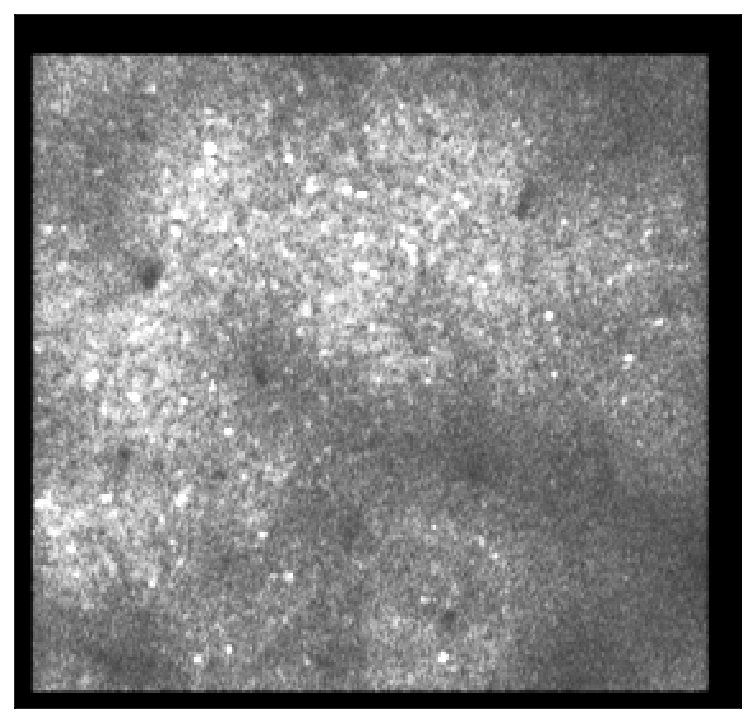

In [11]:
tfu.show_tif(summary['ref_img_3d'][8])

In [12]:
# split the large tiffs into files of size 100 after registration
job.params['split_tif_size'] = 100

In [13]:
%%time
job.register_gpu()

      Found dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_6/registered_fused_data with tag registered_fused_data
Will analyze 121 tifs in 121 batches
   Enforcing positivity
   Launching IO thread
         Memory at batch 0.  Total Used: 042.973 GB, Virtual Available: 460.223 GB, Virtual Used: 042.973 GB, Swap Used: 000.000 GB
Loading Batch 0 of 120
      Loading /mnt/zaru-subjects/AH010/2024-01-17/6/mm2_0p25pixum_laser60p_of_470mw_00001_00001.tif


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 0.20 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 043.160 GB, Virtual Available: 460.036 GB, Virtual Used: 043.160 GB, Swap Used: 000.000 GB
         Memory after movie copied from threadTotal Used: 043.363 GB, Virtual Available: 459.833 GB, Virtual Used: 043.363 GB, Swap Used: 000.000 GB
         Memory after thread memory clearedTotal Used: 043.157 GB, Virtual Available: 460.039 GB, Virtual Used: 043.157 GB, Swap Used: 000.000 GB
   Launching IO thread for next batch
         After IO thread launch:Total Used: 043.157 GB, Virtual Available: 460.039 GB, Virtual Used: 043.157 GB, Swap Used: 000.000 GB
      Loading /mnt/zaru-subjects/AH010/2024-01-17/6/mm2_0p25pixum_laser60p_of_470mw_00001_00002.tif
      Loaded batch of size (15, 100, 250, 289)
      Sending frames 0-10 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.17 sec
         Subtracting min pix vals to enforce positivity
         F

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 0.20 GB
   Computed SNR and smoothed phase corrs in 1.23 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 1.71 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
      Allocated array of shape (15, 100, 272, 285) to store CPU movie
         After array alloc:  Total Used: 045.115 GB, Virtual Available: 458.081 GB, Virtual Used: 045.115 GB, Swap Used: 000.000 GB
   Non rigid transformed (on CPU) in 0.18 sec
         After GPU Batch:    Total Used: 045.229 GB, Virtual Available: 457.967 GB, Virtual Used: 045.229 GB, Swap Used: 000.000 GB
      Sending frames 10-20 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.32 sec
         Shifted batch in 0.30 sec
         Freeing all blocks
      Completed rigid registration in 0.65 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.69 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.156 GB, Virtual Available: 457.040 GB, Virtual Used: 046.156 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.13 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.31 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.69 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 047.945 GB, Virtual Available: 455.251 GB, Virtual Used: 047.945 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.24 sec
         Shifted batch in 0.35 sec
         Freeing all blocks
      Completed rigid registration in 0.63 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.67 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.720 GB, Virtual Available: 456.476 GB, Virtual Used: 046.720 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.11 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.04 sec
   Split movie into blocks in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.31 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.69 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 048.118 GB, Virtual Available: 455.078 GB, Virtual Used: 048.118 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 048.760 GB, Virtual Available: 454.436 GB, Virtual Used: 048.760 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.70 sec
         After GPU Batch:    Total Used: 048.763 GB, Virtual Available: 454.433 GB, Virtual Used: 048.763 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.75 sec
         After GPU Batch:    Total Used: 048.215 GB, Virtual Available: 454.981 GB, Virtual Used: 048.215 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.70 sec
         After GPU Batch:    Total Used: 048.960 GB, Virtual Available: 454.236 GB, Virtual Used: 048.960 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Non rigid transformed (on CPU) in 0.15 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 046.359 GB, Virtual Available: 456.837 GB, Virtual Used: 046.359 GB, Swap Used: 000.000 GB

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



      Sending frames 40-50 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.27 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.05 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.47 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.51 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.146 GB, Virtual Available: 457.050 GB, Virtual Used: 046.146 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 048.791 GB, Virtual Available: 454.405 GB, Virtual Used: 048.791 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.60 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.67 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 048.099 GB, Virtual Available: 455.097 GB, Virtual Used: 048.099 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.14 sec

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



   Clipped movie in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.04 sec

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.32 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.64 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 048.130 GB, Virtual Available: 455.066 GB, Virtual Used: 048.130 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.75 sec
         After GPU Batch:    Total Used: 048.240 GB, Virtual Available: 454.956 GB, Virtual Used: 048.240 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.34 sec
         Shifted batch in 0.29 sec
         Freeing all blocks
      Completed rigid registration in 0.67 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.71 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.191 GB, Virtual Available: 457.005 GB, Virtual Used: 046.191 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.30 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.70 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 047.902 GB, Virtual Available: 455.294 GB, Virtual Used: 047.902 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.31 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.69 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 048.140 GB, Virtual Available: 455.056 GB, Virtual Used: 048.140 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.03 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.08 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.24 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.14 sec
         Shifted batch in 0.14 sec
         Freeing all blocks
      Completed rigid registration in 0.67 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.70 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 045.971 GB, Virtual Available: 457.225 GB, Virtual Used: 045.971 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.76 sec
         After GPU Batch:    Total Used: 048.108 GB, Virtual Available: 455.088 GB, Virtual Used: 048.108 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 048.784 GB, Virtual Available: 454.412 GB, Virtual Used: 048.784 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.68 sec
         After GPU Batch:    Total Used: 048.847 GB, Virtual Available: 454.349 GB, Virtual Used: 048.847 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.69 sec
         After GPU Batch:    Total Used: 048.887 GB, Virtual Available: 454.309 GB, Virtual Used: 048.887 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 048.150 GB, Virtual Available: 455.046 GB, Virtual Used: 048.150 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.68 sec
         After GPU Batch:    Total Used: 048.219 GB, Virtual Available: 454.977 GB, Virtual Used: 048.219 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Non rigid transformed (on CPU) in 0.39 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 047.130 GB, Virtual Available: 456.066 GB, Virtual Used: 047.130 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.22 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.27 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.30 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.12 sec
         After GPU Batch:    Total Used: 046.003 GB, Virtual Available: 457.193 GB, Virtual Used: 046.003 GB, Swap Used: 000.000 GB
      

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.76 sec
         After GPU Batch:    Total Used: 048.062 GB, Virtual Available: 455.134 GB, Virtual Used: 048.062 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.72 sec
         After GPU Batch:    Total Used: 048.050 GB, Virtual Available: 455.146 GB, Virtual Used: 048.050 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.15 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.11 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.08 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.20 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.61 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 047.998 GB, Virtual Available: 455.198 GB, Virtual Used: 047.998 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.67 sec
         After GPU Batch:    Total Used: 048.099 GB, Virtual Available: 455.097 GB, Virtual Used: 048.099 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.16 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.05 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.23 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.69 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 048.006 GB, Virtual Available: 455.190 GB, Virtual Used: 048.006 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.28 sec
         Shifted batch in 0.32 sec
         Freeing all blocks
      Completed rigid registration in 0.63 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.67 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.098 GB, Virtual Available: 457.098 GB, Virtual Used: 046.098 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 048.814 GB, Virtual Available: 454.382 GB, Virtual Used: 048.814 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.29 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.10 sec
         Shifted batch in 0.10 sec
         Freeing all blocks
      Completed rigid registration in 0.69 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.72 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.052 GB, Virtual Available: 457.143 GB, Virtual Used: 046.052 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.30 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.13 sec
         Shifted batch in 0.06 sec
         Freeing all blocks
      Completed rigid registration in 0.62 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.66 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.055 GB, Virtual Available: 457.141 GB, Virtual Used: 046.055 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.75 sec
         After GPU Batch:    Total Used: 048.882 GB, Virtual Available: 454.314 GB, Virtual Used: 048.882 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.81 sec
         After GPU Batch:    Total Used: 047.014 GB, Virtual Available: 456.182 GB, Virtual Used: 047.014 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.77 sec
         After GPU Batch:    Total Used: 047.369 GB, Virtual Available: 455.827 GB, Virtual Used: 047.369 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.60 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.71 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.514 GB, Virtual Available: 456.682 GB, Virtual Used: 046.514 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.13 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.24 sec
         Shifted batch in 0.15 sec
         Freeing all blocks
      Completed rigid registration in 0.70 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.74 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 044.472 GB, Virtual Available: 458.724 GB, Virtual Used: 044.472 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.37 sec
         Shifted batch in 0.26 sec
         Freeing all blocks
      Completed rigid registration in 0.67 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.70 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 044.650 GB, Virtual Available: 458.546 GB, Virtual Used: 044.650 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.19 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Computed non-rigid shifts in 0.32 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Non rigid transformed (on CPU) in 0.44 sec
         After GPU Batch:    Total Used: 046.437 GB, Virtual Available: 456.759 GB, Virtual Used: 046.437 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.24 sec

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



         Shifted batch in 0.26 sec
         Freeing all blocks


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.64 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.68 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 044.992 GB, Virtual Available: 458.204 GB, Virtual Used: 044.992 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shi

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.18 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.24 sec
         Shifted batch in 0.11 sec
         Freeing all blocks
      Completed rigid registration in 0.72 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.75 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.12 sec
         After GPU Batch:    Total Used: 044.521 GB, Virtual Available: 458.675 GB, Virtual Used: 044.521 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.74 sec
         After GPU Batch:    Total Used: 047.215 GB, Virtual Available: 455.981 GB, Virtual Used: 047.215 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.68 sec
         After GPU Batch:    Total Used: 046.711 GB, Virtual Available: 456.485 GB, Virtual Used: 046.711 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.68 sec
         After GPU Batch:    Total Used: 046.819 GB, Virtual Available: 456.377 GB, Virtual Used: 046.819 GB, Swap Used: 000.000 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.77 sec
         After GPU Batch:    Total Used: 047.338 GB, Virtual Available: 455.858 GB, Virtual Used: 047.338 GB, Swap Used: 000.000 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.72 sec
         After GPU Batch:    Total Used: 047.494 GB, Virtual Available: 455.702 GB, Virtual Used: 047.494 GB, Swap Used: 000.000 GB
      Sending frames 60-70 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.59 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 046.591 GB, Virtual Available: 456.605 GB, Virtual Used: 046.591 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.11 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.58 sec
         Computed subpixel shifts in 0.05 sec
      Computed non-rigid shifts in 0.70 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.568 GB, Virtual Available: 456.628 GB, Virtual Used: 046.568 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.24 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.14 sec
         Shifted batch in 0.14 sec
         Freeing all blocks
      Completed rigid registration in 0.66 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.69 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 044.555 GB, Virtual Available: 458.641 GB, Virtual Used: 044.555 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 046.667 GB, Virtual Available: 456.529 GB, Virtual Used: 046.667 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.44 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 045.876 GB, Virtual Available: 457.320 GB, Virtual Used: 045.876 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.18 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.23 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.27 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 044.596 GB, Virtual Available: 458.600 GB, Virtual Used: 044.596 GB, Swap Used: 000.000 GB
      

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 047.195 GB, Virtual Available: 456.001 GB, Virtual Used: 047.195 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.09 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.69 sec
         Computed subpixel shifts in 0.01 sec
      Computed non-rigid shifts in 0.76 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.550 GB, Virtual Available: 456.646 GB, Virtual Used: 046.550 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.69 sec
         After GPU Batch:    Total Used: 047.126 GB, Virtual Available: 456.070 GB, Virtual Used: 047.126 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.11 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.04 sec

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.31 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.67 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.608 GB, Virtual Available: 456.588 GB, Virtual Used: 046.608 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.60 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 046.652 GB, Virtual Available: 456.544 GB, Virtual Used: 046.652 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.31 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.10 sec
         Shifted batch in 0.06 sec
         Freeing all blocks
      Completed rigid registration in 0.66 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.70 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 044.574 GB, Virtual Available: 458.622 GB, Virtual Used: 044.574 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.70 sec
         After GPU Batch:    Total Used: 047.098 GB, Virtual Available: 456.098 GB, Virtual Used: 047.098 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.23 sec
         Shifted batch in 0.44 sec
         Freeing all blocks
      Completed rigid registration in 0.71 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.74 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 045.188 GB, Virtual Available: 458.008 GB, Virtual Used: 045.188 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.09 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.49 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.73 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.568 GB, Virtual Available: 456.628 GB, Virtual Used: 046.568 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.76 sec
         After GPU Batch:    Total Used: 047.200 GB, Virtual Available: 455.996 GB, Virtual Used: 047.200 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.69 sec
         After GPU Batch:    Total Used: 047.374 GB, Virtual Available: 455.822 GB, Virtual Used: 047.374 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 047.217 GB, Virtual Available: 455.979 GB, Virtual Used: 047.217 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.73 sec
         After GPU Batch:    Total Used: 047.111 GB, Virtual Available: 456.085 GB, Virtual Used: 047.111 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Non rigid transformed (on CPU) in 0.11 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 044.754 GB, Virtual Available: 458.442 GB, Virtual Used: 044.754 GB, Swap Used: 000.000 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Sending frames 40-50 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Loaded mov and masks to GPU for rigid reg in 0.37 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.51 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.54 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.12 sec
         After GPU Batch:    Total Used: 044.574 GB, Virtual Available: 458.622 GB, Virtual Used: 044.574 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to en

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.71 sec
         After GPU Batch:    Total Used: 047.042 GB, Virtual Available: 456.154 GB, Virtual Used: 047.042 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.72 sec
         After GPU Batch:    Total Used: 047.184 GB, Virtual Available: 456.012 GB, Virtual Used: 047.184 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.72 sec
         After GPU Batch:    Total Used: 047.402 GB, Virtual Available: 455.794 GB, Virtual Used: 047.402 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.72 sec
         After GPU Batch:    Total Used: 046.815 GB, Virtual Available: 456.381 GB, Virtual Used: 046.815 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.66 sec
         After GPU Batch:    Total Used: 047.252 GB, Virtual Available: 455.944 GB, Virtual Used: 047.252 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.11 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.41 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.17 sec
      Computed non-rigid shifts in 0.69 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.583 GB, Virtual Available: 456.613 GB, Virtual Used: 046.583 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.09 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.30 sec
         Shifted batch in 0.34 sec
         Freeing all blocks
      Completed rigid registration in 0.67 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.71 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 044.683 GB, Virtual Available: 458.513 GB, Virtual Used: 044.683 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.24 sec
         Shifted batch in 0.35 sec
         Freeing all blocks
      Completed rigid registration in 0.62 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.66 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 044.708 GB, Virtual Available: 458.488 GB, Virtual Used: 044.708 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.69 sec
         After GPU Batch:    Total Used: 046.888 GB, Virtual Available: 456.308 GB, Virtual Used: 046.888 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.35 sec
         Shifted batch in 0.31 sec
         Freeing all blocks
      Completed rigid registration in 0.69 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.73 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 044.708 GB, Virtual Available: 458.488 GB, Virtual Used: 044.708 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.75 sec
         After GPU Batch:    Total Used: 046.706 GB, Virtual Available: 456.490 GB, Virtual Used: 046.706 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.05 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.26 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.68 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.589 GB, Virtual Available: 456.607 GB, Virtual Used: 046.589 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.70 sec
         After GPU Batch:    Total Used: 046.725 GB, Virtual Available: 456.471 GB, Virtual Used: 046.725 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.71 sec
         After GPU Batch:    Total Used: 047.335 GB, Virtual Available: 455.861 GB, Virtual Used: 047.335 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.46 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.12 sec
      Computed non-rigid shifts in 0.65 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.563 GB, Virtual Available: 456.633 GB, Virtual Used: 046.563 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 044.567 GB, Virtual Available: 458.629 GB, Virtual Used: 044.567 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.32 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.10 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.58 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.62 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.12 sec
         After GPU Batch:    Total Used: 044.629 GB, Virtual Available: 458.567 GB, Virtual Used: 044.629 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.70 sec
         After GPU Batch:    Total Used: 047.279 GB, Virtual Available: 455.917 GB, Virtual Used: 047.279 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.02 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.74 sec
         After GPU Batch:    Total Used: 046.720 GB, Virtual Available: 456.476 GB, Virtual Used: 046.720 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.71 sec
         After GPU Batch:    Total Used: 047.422 GB, Virtual Available: 455.774 GB, Virtual Used: 047.422 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.71 sec
         After GPU Batch:    Total Used: 047.396 GB, Virtual Available: 455.800 GB, Virtual Used: 047.396 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.07 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.03 sec
   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.44 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.69 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.582 GB, Virtual Available: 456.614 GB, Virtual Used: 046.582 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.75 sec
         After GPU Batch:    Total Used: 047.087 GB, Virtual Available: 456.109 GB, Virtual Used: 047.087 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.16 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.09 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.18 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.67 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.684 GB, Virtual Available: 456.512 GB, Virtual Used: 046.684 GB, Swap Used: 000.000 GB
      Sending frames 70-80 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 044.594 GB, Virtual Available: 458.602 GB, Virtual Used: 044.594 GB, Swap Used: 000.000 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Sending frames 40-50 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Loaded mov and masks to GPU for rigid reg in 0.33 sec
         Subtracting min pix vals to enforce positivity


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.06 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.55 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.58 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.12 sec
         After GPU Batch:    Total Used: 044.613 GB, Virtual Available: 458.583 GB, Virtual Used: 044.613 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.65 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.73 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 046.618 GB, Virtual Available: 456.578 GB, Virtual Used: 046.618 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.29 sec
         Shifted batch in 0.32 sec
         Freeing all blocks
      Completed rigid registration in 0.65 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.68 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 045.151 GB, Virtual Available: 458.045 GB, Virtual Used: 045.151 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.22 sec
         Shifted batch in 0.23 sec
         Freeing all blocks


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.69 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.73 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 045.194 GB, Virtual Available: 458.002 GB, Virtual Used: 045.194 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shi

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 044.654 GB, Virtual Available: 458.542 GB, Virtual Used: 044.654 GB, Swap Used: 000.000 GB

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.



      Sending frames 40-50 to GPU for rigid registration


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Loaded mov and masks to GPU for rigid reg in 0.34 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         GPU Mov of shape 15, 10, 272, 285; 0.09 GB


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocating memory for shifted movie


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Registered batch in 0.06 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.61 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.65 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.12 sec
         After GPU Batch:    Total Used: 044.676 GB, Virtual Available: 458.520 GB, Virtual Used: 044.676 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.75 sec
         After GPU Batch:    Total Used: 047.291 GB, Virtual Available: 455.905 GB, Virtual Used: 047.291 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.63 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.70 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.654 GB, Virtual Available: 456.542 GB, Virtual Used: 046.654 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.72 sec
         After GPU Batch:    Total Used: 047.240 GB, Virtual Available: 455.956 GB, Virtual Used: 047.240 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.72 sec
         After GPU Batch:    Total Used: 047.136 GB, Virtual Available: 456.060 GB, Virtual Used: 047.136 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.71 sec
         After GPU Batch:    Total Used: 047.443 GB, Virtual Available: 455.753 GB, Virtual Used: 047.443 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.03 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.74 sec
         After GPU Batch:    Total Used: 047.042 GB, Virtual Available: 456.154 GB, Virtual Used: 047.042 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.63 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.70 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.598 GB, Virtual Available: 456.598 GB, Virtual Used: 046.598 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.57 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Computed subpixel shifts in 0.05 sec
      Computed non-rigid shifts in 0.73 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.683 GB, Virtual Available: 456.513 GB, Virtual Used: 046.683 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
  

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.30 sec
         Shifted batch in 0.35 sec
         Freeing all blocks
      Completed rigid registration in 0.72 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.76 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.11 sec
         After GPU Batch:    Total Used: 044.582 GB, Virtual Available: 458.614 GB, Virtual Used: 044.582 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.75 sec
         After GPU Batch:    Total Used: 047.378 GB, Virtual Available: 455.818 GB, Virtual Used: 047.377 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.74 sec
         After GPU Batch:    Total Used: 047.597 GB, Virtual Available: 455.599 GB, Virtual Used: 047.597 GB, Swap Used: 000.000 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.70 sec
         After GPU Batch:    Total Used: 048.193 GB, Virtual Available: 455.004 GB, Virtual Used: 048.192 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.74 sec
         After GPU Batch:    Total Used: 047.766 GB, Virtual Available: 455.431 GB, Virtual Used: 047.765 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.71 sec
         After GPU Batch:    Total Used: 046.866 GB, Virtual Available: 456.331 GB, Virtual Used: 046.865 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.01 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.55 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         After GPU Batch:    Total Used: 046.306 GB, Virtual Available: 456.891 GB, Virtual Used: 046.305 GB, Swap Used: 000.000 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.07 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.10 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.74 sec
         After GPU Batch:    Total Used: 048.011 GB, Virtual Available: 455.186 GB, Virtual Used: 048.010 GB, Swap Used: 000.002 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.06 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.11 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.14 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.19 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.13 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec
   Split movie into blocks in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.05 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.23 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.70 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.881 GB, Virtual Available: 456.317 GB, Virtual Used: 046.879 GB, Swap Used: 000.002 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.22 sec
         Shifted batch in 0.44 sec
         Freeing all blocks
      Completed rigid registration in 0.70 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.73 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 045.122 GB, Virtual Available: 458.076 GB, Virtual Used: 045.120 GB, Swap Used: 000.002 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.09 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.05 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Split movie into blocks in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.05 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.23 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.72 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.501 GB, Virtual Available: 456.698 GB, Virtual Used: 046.498 GB, Swap Used: 000.002 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.38 sec
         Shifted batch in 0.27 sec
         Freeing all blocks
      Completed rigid registration in 0.69 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.72 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 044.674 GB, Virtual Available: 458.524 GB, Virtual Used: 044.672 GB, Swap Used: 000.002 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.05 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.38 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.73 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.14 sec
         After GPU Batch:    Total Used: 046.672 GB, Virtual Available: 456.527 GB, Virtual Used: 046.669 GB, Swap Used: 000.002 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

         Registered batch in 0.36 sec
         Shifted batch in 0.31 sec
         Freeing all blocks
      Completed rigid registration in 0.70 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.74 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 045.179 GB, Virtual Available: 458.019 GB, Virtual Used: 045.177 GB, Swap Used: 000.002 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.16 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec
   Split movie into blocks in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.05 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 0.40 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.72 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.15 sec
         After GPU Batch:    Total Used: 046.442 GB, Virtual Available: 456.756 GB, Virtual Used: 046.440 GB, Swap Used: 000.002 GB
      Sending frames 50-60 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.04 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.09 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Non rigid transformed (on CPU) in 0.72 sec
         After GPU Batch:    Total Used: 047.454 GB, Virtual Available: 455.744 GB, Virtual Used: 047.452 GB, Swap Used: 000.002 GB
      Sending frames 40-50 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.07 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.12 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.02 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.15 sec
      Transferred shifted 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


      Completed rigid registration in 0.19 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


         Allocated GPU array for non-rigid reg in 0.12 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Completed FFT of blocks and computed phase correlations in 0.04 sec


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


   Computed SNR and smoothed phase corrs in 0.17 sec
         Computed subpixel shifts in 0.00 sec
      Computed non-rigid shifts in 0.65 sec
      Transferred shifted mov of shape (10, 15, 272, 285) to CPU in 0.00 sec
   Non rigid transformed (on CPU) in 0.13 sec
         After GPU Batch:    Total Used: 045.053 GB, Virtual Available: 458.146 GB, Virtual Used: 045.050 GB, Swap Used: 000.002 GB
      Sending frames 30-40 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.02 sec
         Subtracting min pix vals to enforce positivity
         Fusing and padding movie
         GPU Mov of shape 15, 10, 272, 285; 0.09 GB
         Allocating memory for shifted movie
         Registered batch in 0.01 sec
         Shifted batch in 0.02 sec
         Freeing all blocks
      Completed rigid registration in 0.06 sec
         Allocated GPU array for non-rigid reg in 0.01 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of 

In [14]:
mov_full = job.get_registered_movie('registered_fused_data', 'fused')
im_full = mov_full[:,:200].mean(axis=1).compute()


KeyboardInterrupt



In [ ]:
im_full.shape

In [ ]:
tfu.show_tif(im_full[8])

In [76]:
# Pick the parameters you want to sweep, and enter them in the tuples.
# It will do all combinations of parameters, so if you have many parameters it will be many combinations! 
job.params['t_batch_size'] = 300
params_to_sweep = {
    'intensity_thresh' : (0.1,),
    'n_svd_comp' : (50,), # if you have multiple values here, make sure you pass mov=svd_info
    'conv_filt_xy': (1.0,3.0),
    'npil_filt_xy': (8.0, 12.0, 15.0),
    'conv_filt_z' : (1.0,),
    'npil_filt_z' : (1.0,),
    'sdnorm_exp' : (1.0,)
}

sweep_summary = job.sweep_params(params_to_sweep, mov = mov_full,testing_dir_tag='sweep-nosvd',
                           do_vmap=True, all_combinations=True, n_test_iters = 1)
# use this to access older sweep results
# sweep_summary = n.load(os.path.join(job.dirs['sweep-full'], 'sweep_summary.npy'),allow_pickle=True).item()
job.vis_vmap_sweep(sweep_summary)

   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd with tag sweep-nosvd
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00000 with tag sweep-nosvd-comb_00000
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00001 with tag sweep-nosvd-comb_00001
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00002 with tag sweep-nosvd-comb_00002
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00003 with tag sweep-nosvd-comb_00003
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00004 with tag sweep-nosvd-comb_00004
   Created dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_1/sweep-nosvd/sweep-nosvd-comb_00005 with tag sweep-nosvd-comb_00005
   Saving summary for 6 combinations to /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2

Viewer(camera=Camera(center=(0.0, 550.5, 470.0), zoom=0.9491379310344827, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=10, ndisplay=2, last_used=9, range=((0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 2.0, 1.0), (0.0, 3.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 15.0, 1.0), (0.0, 1102.0, 1.0), (0.0, 941.0, 1.0)), current_step=(0, 0, 0, 0, 0, 0, 0, 7, 550, 470), order=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), axis_labels=('intensity_thresh', 'n_svd_comp', 'conv_filt_xy', 'npil_filt_xy', 'conv_filt_z', 'npil_filt_z', 'sdnorm_exp', 'z', 'y', 'x')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'mean_img' at 0x7f09aa4386a0>, <Image layer 'max_img' at 0x7f09aa417940>, <Image layer 'Corrmap Sweep' at 0x7f09a192c520>], help='use <2> for transform', status='Ready', tooltip

In [77]:
job.vis_vmap_sweep(sweep_summary)

[1, 1, 2, 3, 1, 1, 1]
(1, 1, 2, 3, 1, 1, 1, 15, 1102, 941)


Viewer(camera=Camera(center=(0.0, 550.5, 470.0), zoom=0.9491379310344827, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=10, ndisplay=2, last_used=9, range=((0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 2.0, 1.0), (0.0, 3.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 1.0, 1.0), (0.0, 15.0, 1.0), (0.0, 1102.0, 1.0), (0.0, 941.0, 1.0)), current_step=(0, 0, 0, 0, 0, 0, 0, 7, 550, 470), order=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), axis_labels=('intensity_thresh', 'n_svd_comp', 'conv_filt_xy', 'npil_filt_xy', 'conv_filt_z', 'npil_filt_z', 'sdnorm_exp', 'z', 'y', 'x')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'mean_img' at 0x7f092197cf70>, <Image layer 'max_img' at 0x7f09218ca5e0>, <Image layer 'Corrmap Sweep' at 0x7f09218d1520>], help='use <2> for transform', status='Ready', tooltip

In [106]:

job.params['t_batch_size'] = 400
job.params['intensity_thresh'] = (0.1)
job.params['n_svd_comp'] = (50), # if you have multiple values here, make sure you pass mov=svd_info
job.params['conv_filt_xy']= 2.5
job.params['npil_filt_xy']= 15.0
job.params['conv_filt_z'] = 1.0
job.params['npil_filt_z'] = 1.0
job.params['sdnorm_exp'] = 1.0

In [107]:
job.calculate_corr_map(mov_full)

   Updated main params file
   Created dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/mov_sub with tag mov_sub
   Saving mov_sub to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/mov_sub
   Using conv_filt: gaussian, 1.00, 2.50
   Using np_filt: unif, 1.00, 15.00
   Created files and dirs for 1 batches
      Running batch 1 of 1
         Will process 313 frames (0-313, t_batch_size: 400)
      Loaded and swapped, idx 0 to 313
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 43.85 seconds
      Saving to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000


((array([[[0.        , 0.        , 0.        , ..., 1.28376966,
           1.31376819, 1.31376819],
          [0.        , 0.        , 0.        , ..., 1.28376966,
           1.31376819, 1.31376819],
          [0.        , 0.        , 0.        , ..., 1.27431526,
           1.31361761, 1.31361761],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ]],
  
         [[0.        , 0.        , 0.        , ..., 0.66236551,
           0.69285873, 0.69285873],
          [0.        , 0.        , 0.        , ..., 0.66236551,
           0.69285873, 0.69285873],
          [0.        , 0.        , 0.        , ..., 0.7159002 ,
           0.78412234, 0.78412234],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
  

In [108]:
vmap = job.load_iter_results(-1)['vmap']

   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000


In [114]:
napari.view_image(vmap)

Viewer(camera=Camera(center=(0.0, 397.5, 302.5), zoom=1.4304922250836567, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(7.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 15.0, 1.0), (0.0, 796.0, 1.0), (0.0, 606.0, 1.0)), current_step=(7, 397, 302), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'vmap' at 0x7f5866d05220>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x7f5b6ef8faf0>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

In [115]:
%%time
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 2.65

job.params['activity_thresh'] = 10.0
job.params['percentile'] = 98.0
job.params['extend_thresh'] = 0.15
job.params['max_iter'] = 10000 # maximum number of ROIs detected in given patch
combined_dir = job.patch_and_detect(combined_name='combined-full')

   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
63 blocks with overlap (42 without, 1.50x increase)
63 blocks with overlap (42 without, 1.50x increase)
   Detecting from patch: 0/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0000 with tag patch-0000
   Running cell detection on patch 0000 at /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0000, max 10000 iters
   Patch bounds are [ 0 15], [  0 120], [  0 120]
   Cell center bounds are [ 0 15], [  0 102], [  0 100]
   Time bounds are (None, None)
mov_sub
   Loading 0.25 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0005
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 08, 071, 480, peak: 4.661, thresh: 2.983, 18 frames, 219 pixels
      Added cell 2 at 06, 058, 455, peak: 4.151, thresh: 2.891, 18 frames, 284 pixels
      Added cell 3 at 07, 047, 464, peak: 3.975, thresh: 3.138, 27 frames, 131 pixels
      Added cell 4 at 04, 091, 478, peak: 3.959, thresh: 3.662, 10 frames, 134 pixels
      Added cell 5 at 02, 025, 502, peak: 3.605, thresh: 2.972, 16 frames, 105 pixels
      Added cell 6 at 08, 095, 503, peak: 3.563, thresh: 4.506, 10 frames, 94 pixels
      Added cell 7 at 09, 085, 492, peak: 3.557, thresh: 3.460, 17 frames, 155 pixels
     

      Added cell 5 at 03, 181, 167, peak: 3.171, thresh: 3.155, 10 frames, 183 pixels
      Added cell 6 at 03, 184, 172, peak: 2.970, thresh: 2.929, 19 frames, 200 pixels
      Iter 0002: peak is too small  - ending extraction
   Found 6 cells in 2 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0008/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0008/iscell.npy
   Detecting from patch: 9/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0009 with tag patch-0009
   Running cell detection on patch 0009 at /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0009, max 10000 iters
   Patch bounds are [ 0 15], [ 84 204], [162 282]
   Cell center bounds are [ 0 15], [102 186], [181 262]
 

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0012
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 07, 185, 481, peak: 6.266, thresh: 3.394, 41 frames, 213 pixels
      Added cell 2 at 08, 135, 483, peak: 6.058, thresh: 3.883, 40 frames, 237 pixels
      Added cell 3 at 04, 125, 472, peak: 5.697, thresh: 4.136, 32 frames, 142 pixels
      Added cell 4 at 09, 185, 480, peak: 4.682, thresh: 3.501, 40 frames, 198 pixels
      Added cell 5 at 08, 126, 501, peak: 4.495, thresh: 3.468, 18 frames, 195 pixels
      Added cell 6 at 05, 185, 481, peak: 4.290, thresh: 2.516, 47 frames, 253 pixels
      Added cell 7 at 01, 106, 462, peak: 4.239, thresh: 3.823, 29 frames, 151 pixels
    

      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0014
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0014/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0014/iscell.npy
   Detecting from patch: 15/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0015 with tag patch-0015
   Running cell detection on patch 0015 at /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0015, max 10000 iters
   Patch bounds are [ 0 1

      Added cell 17 at 05, 228, 368, peak: 2.899, thresh: 3.053, 13 frames, 139 pixels
      Added cell 18 at 04, 210, 379, peak: 2.809, thresh: 2.533, 17 frames, 195 pixels
      Added cell 19 at 01, 208, 410, peak: 2.808, thresh: 2.153, 10 frames, 36 pixels
      Added cell 20 at 10, 214, 397, peak: 2.773, thresh: 2.451, 19 frames, 230 pixels
      Added cell 21 at 02, 197, 408, peak: 2.758, thresh: 2.040, 12 frames, 84 pixels
      Added cell 22 at 03, 210, 411, peak: 2.669, thresh: 1.963, 9 frames, 47 pixels
      Iter 0003: peak is too small  - ending extraction
   Found 22 cells in 3 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0018/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0018/iscell.npy
   Detecting from patch: 19/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found

      Added cell 33 at 03, 259, 589, peak: 3.416, thresh: 3.243, 16 frames, 124 pixels
      Added cell 34 at 03, 210, 598, peak: 3.399, thresh: 2.377, 8 frames, 261 pixels
      Added cell 35 at 05, 186, 592, peak: 3.390, thresh: 0.142, 24 frames, 287 pixels
      Added cell 36 at 04, 209, 559, peak: 3.362, thresh: 2.669, 14 frames, 105 pixels
      Added cell 37 at 04, 246, 596, peak: 3.352, thresh: 0.179, 75 frames, 111 pixels
      Added cell 38 at 01, 263, 528, peak: 3.327, thresh: 3.035, 23 frames, 113 pixels
      Added cell 39 at 06, 229, 589, peak: 3.321, thresh: 0.207, 31 frames, 320 pixels
      Added cell 40 at 07, 216, 586, peak: 3.238, thresh: 1.910, 11 frames, 269 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 14, 216, 571, peak: 3.219, thresh: 0.336, 11 frames, 83 pixels
      Added cell 42 at 07, 255, 586, peak: 3.196, thresh: 1.723, 13 frames, 256 pixels
      Added cell 43 at 10, 189, 579, peak: 3.149, thresh: 0.987, 15 frames, 114 pixels
   

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0024
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 04, 337, 278, peak: 4.802, thresh: 3.551, 36 frames, 159 pixels
      Added cell 2 at 05, 317, 278, peak: 4.196, thresh: 3.191, 30 frames, 154 pixels
      Added cell 3 at 07, 336, 332, peak: 4.118, thresh: 3.730, 22 frames, 86 pixels
      Added cell 4 at 08, 316, 335, peak: 3.683, thresh: 3.103, 15 frames, 126 pixels
      Added cell 5 at 05, 313, 268, peak: 3.446, thresh: 3.125, 16 frames, 131 pixels
      Added cell 6 at 09, 295, 337, peak: 3.078, thresh: 3.134, 11 frames, 95 pixels
      Added cell 7 at 09, 351, 264, peak: 2.923, thresh: 2.744, 12 frames, 189 pixels
      

      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0027
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 03, 338, 525, peak: 5.020, thresh: 4.516, 23 frames, 134 pixels
      Added cell 2 at 03, 279, 548, peak: 4.347, thresh: 3.846, 22 frames, 134 pixels
      Added cell 3 at 04, 278, 596, peak: 4.311, thresh: 0.164, 30 frames, 302 pixels
      Added cell 4 at 04, 286, 597, peak: 4.028, thresh: 0.166, 31 frames, 306 pixels
      Added cell 5 at 03, 316, 539, peak: 3.992, thresh: 4.446, 10 frames, 190 pixels
      Added cell 6 at 04, 310, 596, peak: 3.942, thresh: 0.156, 37 frames, 284 pixels
      Added cell 7 at 04, 273, 540, peak: 3.888, thresh: 3.647, 17 frames, 168 pixels
      Added cell 8 at 06, 310, 525, peak: 3.830, thresh: 3.741, 16 frames, 141 pixels
   Iter 0001: run

   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 05, 378, 181, peak: 5.643, thresh: 3.803, 20 frames, 278 pixels
      Added cell 2 at 02, 418, 235, peak: 5.399, thresh: 4.467, 33 frames, 135 pixels
      Added cell 3 at 05, 364, 244, peak: 4.262, thresh: 3.700, 26 frames, 100 pixels
      Added cell 4 at 08, 425, 220, peak: 3.971, thresh: 3.923, 7 frames, 166 pixels
      Added cell 5 at 02, 403, 199, peak: 3.928, thresh: 4.490, 20 frames, 116 pixels
      Added cell 6 at 07, 370, 235, peak: 3.591, thresh: 2.718, 22 frames, 219 pixels
      Added cell 7 at 00, 367, 258, peak: 3.588, thresh: 3.102, 18 frames, 87 pixels
      Added cell 8 at 07, 433, 241, peak: 3.580, thresh: 2.889, 21 frames, 221 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 08, 356, 209, peak: 3.449, thresh: 3.831, 13 frames, 111 pixels
      Added cell 10 at 03, 390, 244, peak: 3.392, thresh: 3.676, 10 frames, 167 pixels
      Added cell 11 at 04, 396, 187, peak: 3.386, thresh:

      Added cell 17 at 03, 369, 399, peak: 3.206, thresh: 3.125, 11 frames, 160 pixels
      Added cell 18 at 08, 389, 364, peak: 3.063, thresh: 2.425, 13 frames, 251 pixels
      Added cell 19 at 02, 397, 351, peak: 3.054, thresh: 2.884, 18 frames, 132 pixels
      Added cell 20 at 06, 398, 386, peak: 3.032, thresh: 3.225, 18 frames, 132 pixels
      Added cell 21 at 09, 369, 374, peak: 2.889, thresh: 3.026, 17 frames, 151 pixels
      Added cell 22 at 02, 367, 423, peak: 2.831, thresh: 2.197, 22 frames, 215 pixels
      Added cell 23 at 06, 423, 383, peak: 2.823, thresh: 2.626, 14 frames, 205 pixels
      Added cell 24 at 12, 393, 355, peak: 2.758, thresh: 2.635, 16 frames, 87 pixels
   Iter 0003: running 04 ROIs in parallel
      Added cell 25 at 00, 419, 371, peak: 2.755, thresh: 2.602, 9 frames, 113 pixels
      Added cell 26 at 06, 393, 394, peak: 2.723, thresh: 2.885, 12 frames, 125 pixels
      Added cell 27 at 04, 413, 381, peak: 2.686, thresh: 2.694, 17 frames, 282 pixels
   

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0035
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 07 ROIs in parallel
      Added cell 1 at 08, 518, 025, peak: 4.168, thresh: 3.046, 28 frames, 169 pixels
      Added cell 2 at 07, 473, 026, peak: 3.436, thresh: 2.535, 25 frames, 173 pixels
      Added cell 3 at 07, 498, 053, peak: 3.047, thresh: 2.931, 15 frames, 159 pixels
      Added cell 4 at 07, 514, 019, peak: 2.790, thresh: 3.129, 11 frames, 126 pixels
      Added cell 5 at 06, 498, 018, peak: 2.750, thresh: 2.603, 5 frames, 22 pixels
      Added cell 6 at 02, 512, 029, peak: 2.707, thresh: 1.400, 15 frames, 47 pixels
      Added cell 7 at 08, 466, 035, peak: 2.657, thresh: 2.724, 8 frames, 82 pixels
      Ite

   Found 10 cells in 2 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0039/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0039/iscell.npy
   Detecting from patch: 40/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0040 with tag patch-0040
   Running cell detection on patch 0040 at /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0040, max 10000 iters
   Patch bounds are [ 0 15], [422 542], [405 525]
   Cell center bounds are [ 0 15], [440 524], [424 505]
   Time bounds are (None, None)
mov_sub
   Loading 0.25 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0043
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0043/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0043/iscell.npy
   Detecting from patch: 44/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0044 with tag patch-0044
   Running cell detection on patch 0044 at /mnt/md0/runs/s3d-AH0

      Added cell 1 at 14, 567, 572, peak: 3.904, thresh: 0.166, 28 frames, 60 pixels
      Added cell 2 at 09, 556, 582, peak: 3.534, thresh: 0.164, 43 frames, 136 pixels
      Added cell 3 at 14, 556, 573, peak: 3.423, thresh: 0.013, 79 frames, 95 pixels
      Added cell 4 at 14, 608, 573, peak: 3.389, thresh: 0.407, 17 frames, 198 pixels
      Added cell 5 at 14, 590, 573, peak: 3.173, thresh: -0.009, 24 frames, 84 pixels
      Added cell 6 at 08, 584, 584, peak: 3.082, thresh: 3.272, 12 frames, 271 pixels
      Added cell 7 at 04, 533, 596, peak: 3.030, thresh: 0.544, 28 frames, 266 pixels
      Added cell 8 at 14, 538, 572, peak: 3.004, thresh: 0.714, 15 frames, 187 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 09, 582, 581, peak: 3.015, thresh: 2.745, 9 frames, 110 pixels
      Added cell 10 at 07, 530, 587, peak: 2.952, thresh: 2.426, 16 frames, 219 pixels
      Added cell 11 at 10, 525, 536, peak: 2.944, thresh: 2.766, 14 frames, 97 pixels
      Added ce

      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0051
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 02, 661, 243, peak: 6.291, thresh: 3.937, 47 frames, 186 pixels
      Added cell 2 at 09, 656, 249, peak: 5.686, thresh: 4.788, 32 frames, 118 pixels
      Added cell 3 at 08, 642, 236, peak: 5.604, thresh: 3.840, 45 frames, 128 pixels
      Added cell 4 at 06, 667, 253, peak: 4.842, thresh: 3.662, 37 frames, 113 pixels
      Added cell 5 at 05, 662, 214, peak: 4.752, thresh: 4.364, 22 frames, 205 pixels
      Added cell 6 at 06, 643, 224, peak: 4.653, thresh: 3.562, 30 frames, 140 pixels
      Added cell 7 at 03, 626, 219, peak: 4.392, thresh: 3.112, 32 frames, 296 pixels
      Added cell 8 at 02, 617, 238, peak: 4.138, thresh: 2.886, 41 frames, 234 pixels
   Iter 0001: run

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0053
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 08, 687, 346, peak: 6.643, thresh: 3.260, 64 frames, 196 pixels
      Added cell 2 at 03, 622, 361, peak: 6.224, thresh: 3.482, 74 frames, 222 pixels
      Added cell 3 at 09, 678, 381, peak: 5.707, thresh: 5.243, 21 frames, 163 pixels
      Added cell 4 at 08, 670, 366, peak: 5.252, thresh: 3.707, 34 frames, 164 pixels
      Added cell 5 at 10, 630, 364, peak: 5.013, thresh: 3.557, 46 frames, 131 pixels
      Added cell 6 at 02, 630, 363, peak: 4.999, thresh: 3.416, 74 frames, 223 pixels
      Added cell 7 at 10, 687, 348, peak: 4.902, thresh: 3.206, 75 frames, 184 pixels
    

      Added cell 17 at 05, 654, 592, peak: 2.740, thresh: 3.372, 10 frames, 44 pixels
      Added cell 18 at 02, 688, 601, peak: 2.697, thresh: 2.499, 26 frames, 163 pixels
      Added cell 19 at 10, 639, 579, peak: 2.673, thresh: 3.737, 7 frames, 24 pixels
      Added cell 20 at 08, 666, 585, peak: 2.666, thresh: 1.757, 12 frames, 155 pixels
      Added cell 21 at 05, 637, 592, peak: 2.654, thresh: 2.699, 10 frames, 127 pixels
      Iter 0003: peak is too small  - ending extraction
   Found 21 cells in 3 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0055/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0055/iscell.npy
   Detecting from patch: 56/63
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection with tag detection
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0056 wit

   Loaded
   Loading from /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/iters/batch0000
      Movie shape: (313, 15, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0058
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 2.650 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 05, 721, 253, peak: 7.839, thresh: 3.591, 64 frames, 241 pixels
      Added cell 2 at 03, 708, 235, peak: 5.639, thresh: 4.006, 51 frames, 138 pixels
      Added cell 3 at 07, 735, 248, peak: 5.635, thresh: 4.424, 34 frames, 126 pixels
      Added cell 4 at 04, 730, 232, peak: 5.620, thresh: 4.083, 31 frames, 187 pixels
      Added cell 5 at 07, 722, 252, peak: 5.397, thresh: 2.876, 71 frames, 221 pixels
      Added cell 6 at 06, 702, 200, peak: 4.898, thresh: 4.478, 32 frames, 74 pixels
      Added cell 7 at 07, 694, 261, peak: 4.629, thresh: 3.773, 23 frames, 150 pixels
     

      Added cell 33 at 08, 748, 271, peak: 3.409, thresh: 3.773, 10 frames, 240 pixels
      Added cell 34 at 07, 742, 289, peak: 3.397, thresh: 2.095, 41 frames, 156 pixels
      Added cell 35 at 11, 783, 321, peak: 3.394, thresh: 3.852, 13 frames, 62 pixels
      Added cell 36 at 06, 730, 301, peak: 3.311, thresh: 2.786, 31 frames, 175 pixels
      Added cell 37 at 03, 766, 282, peak: 3.309, thresh: 2.037, 37 frames, 248 pixels
      Added cell 38 at 07, 750, 324, peak: 3.298, thresh: 1.922, 12 frames, 43 pixels
      Added cell 39 at 01, 758, 269, peak: 3.297, thresh: 0.489, 33 frames, 186 pixels
      Added cell 40 at 07, 725, 337, peak: 3.294, thresh: 2.516, 22 frames, 267 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 10, 718, 326, peak: 3.243, thresh: 2.667, 31 frames, 74 pixels
      Added cell 42 at 09, 733, 317, peak: 3.097, thresh: 3.370, 16 frames, 109 pixels
      Added cell 43 at 09, 738, 340, peak: 3.094, thresh: 2.042, 29 frames, 273 pixels
    

      Added cell 49 at 02, 746, 408, peak: 3.155, thresh: 3.052, 12 frames, 262 pixels
      Added cell 50 at 07, 727, 371, peak: 3.138, thresh: 2.193, 15 frames, 258 pixels
      Added cell 51 at 09, 716, 349, peak: 3.118, thresh: 3.542, 18 frames, 103 pixels
      Added cell 52 at 06, 779, 356, peak: 3.087, thresh: 0.683, 52 frames, 167 pixels
      Added cell 53 at 03, 767, 404, peak: 3.029, thresh: 0.383, 43 frames, 256 pixels
      Added cell 54 at 07, 707, 401, peak: 3.002, thresh: 2.382, 21 frames, 186 pixels
      Added cell 55 at 06, 779, 343, peak: 3.000, thresh: 0.905, 41 frames, 255 pixels
      Added cell 56 at 09, 739, 401, peak: 2.997, thresh: 2.668, 16 frames, 115 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 02, 762, 399, peak: 3.012, thresh: 1.606, 42 frames, 96 pixels
      Added cell 58 at 11, 794, 361, peak: 2.994, thresh: 0.645, 34 frames, 229 pixels
      Added cell 59 at 03, 709, 365, peak: 2.957, thresh: 2.799, 18 frames, 145 pixels
  

      Added cell 17 at 00, 753, 551, peak: 3.367, thresh: 5.391, 7 frames, 56 pixels
      Added cell 18 at 03, 719, 598, peak: 3.346, thresh: 2.032, 19 frames, 262 pixels
      Added cell 19 at 09, 782, 581, peak: 3.344, thresh: 3.495, 15 frames, 191 pixels
      Added cell 20 at 00, 753, 543, peak: 3.340, thresh: 4.436, 20 frames, 256 pixels
      Added cell 21 at 10, 771, 580, peak: 3.337, thresh: 3.128, 12 frames, 117 pixels
      Added cell 22 at 01, 758, 562, peak: 3.323, thresh: 3.799, 20 frames, 262 pixels
      Added cell 23 at 04, 761, 595, peak: 3.314, thresh: 3.457, 8 frames, 223 pixels
      Added cell 24 at 05, 707, 593, peak: 3.257, thresh: 0.304, 43 frames, 210 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 01, 758, 600, peak: 3.239, thresh: 1.378, 8 frames, 187 pixels
      Added cell 26 at 03, 766, 587, peak: 3.238, thresh: 1.821, 24 frames, 209 pixels
      Added cell 27 at 03, 766, 536, peak: 3.171, thresh: 3.139, 20 frames, 260 pixels
     

      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0035 with tag detection-patch-0035
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0036 with tag detection-patch-0036
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0037 with tag detection-patch-0037
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0038 with tag detection-patch-0038
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0039 with tag detection-patch-0039
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0040 with tag detection-patch-0040
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0041 with tag detection-patch-0041
      Found dir /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/patch-0042 with tag detection-patch-0042
      Fo

In [117]:
outputs = ui.load_outputs(combined_dir, load_traces=False)
v,layers = ui.create_ui(outputs)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir,overwrite=True)

Cells
('vmap_peak', (2.6505692, 3.946812725067139), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7f5a06666940>)
Updating cell 46
1087, 1087 cells valid
Cells
Updating cell 41
1086, 1086 cells valid
Cells
Updating cell 161
1085, 1085 cells valid
Cells
Updating cell 144
1084, 1084 cells valid
Cells
Updating cell 158
1083, 1083 cells valid
Cells
Updating cell 142
1082, 1082 cells valid
Cells
Updating cell 142
1083, 1083 cells valid
Cells
Updating cell 142
1082, 1082 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 275
1082, 1082 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 275
1082, 1082 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 248
1080, 1080 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 275
1080, 1080 cells valid
Cells
Updating cell 275
1081, 1081 cells valid
Cells
Updating cell 275
1080, 1080 cells valid
Cells
Updating cell 274
1079,

In [118]:
job.compute_npil_masks(combined_dir)

'/mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full'

In [122]:
traces = job.extract_and_deconvolve(stats_dir = combined_dir, mov=mov_full, crop=False)

   Updated main params file
   Movie shape: (15, 313, 796, 606)
1092
   Extracting 1092 valid cells, and saving cell flags to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full/iscell_extracted.npy
   Extracting activity
Will extract in 1 batches of 500
Saving intermediate results to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full
Extracting batch 0000 of 0001
Batch size: 8 GB
   Deconvolving
   Saving to /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full


In [123]:
combined_dir = job.dirs['detection-combined-full']

In [124]:
outputs = ui.load_outputs(combined_dir, load_traces=True)
v,layers = ui.create_ui(outputs)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir)

Found old curated iscell with 1063 of 1092 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full/iscell_curated_old_17-01-24_13-09-52.npy
Cells
Found old curated + slider-ed iscell with 1063 of 1092 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-AH010_2024-01-16-2umpix3p9fps-laser70p/detection/combined-full/iscell_curated_slider_old_17-01-24_13-09-52.npy
('vmap_peak', (2.6505692, 3.946812725067139), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7f57d5836160>)
